In [ ]:
"""
TỰ THIẾT KẾ KERNEL TÙY CHỈNH
Tạo các kernel tùy chỉnh để đạt được các hiệu ứng khác nhau
Các hiệu ứng bao gồm:
- Làm mờ (Blur)
- Làm mờ Gaussian (Gaussian Blur)
- Làm sắc nét (Sharpen)
- Làm sắc nét mạnh (Strong Sharpen)
- Phát hiện cạnh (Edge Detection)
- Hiệu ứng nổi (Emboss)
- Hiệu ứng chuyển động (Motion Blur)
- Viền nhẹ (Outline)
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [4]:
path = r"D:\UTH-CVIP-assignments\Solutions\Lab 2 (Chapter 2.1)\Bài tập nâng cao\Question 1\original.jpg"

# hỗ trợ đọc đường dẫn có dấu tiếng việt
img = cv2.imdecode(
    np.fromfile(path, dtype=np.uint8),
    cv2.IMREAD_COLOR
)
if img is None:
    print("Lỗi: Không tìm thấy 'original.jpg'! Hãy đặt ảnh cùng thư mục với file code.")
    sys.exit(1)

# Chuyển sang RGB để hiển thị bằng matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
# ==================== HÀM TIỆN ÍCH ÁP DỤNG KERNEL ====================
def apply_kernel(img_rgb, kernel):
    """
    Áp dụng kernel an toàn cho ảnh màu:
    - Chuyển ảnh sang float32
    - Dùng cv2.filter2D (áp dụng cho từng kênh)
    - Clip kết quả về [0,255] và trả về uint8
    """
    # đảm bảo kernel là float32
    kernel = np.array(kernel, dtype=np.float32)

    # Chuyển ảnh sang float32 để tránh overflow/underflow
    img_f = img_rgb.astype(np.float32)

    # Áp dụng filter2D cho từng kênh
    channels = []
    for c in range(3):
        ch = cv2.filter2D(img_f[:, :, c], ddepth=-1, kernel=kernel)
        channels.append(ch)

    # Ghép lại và chuẩn hoá
    out = np.stack(channels, axis=2)

    # Một số kernel (edge, emboss...) có thể tạo giá trị âm hoặc >255 -> clip
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out


In [ ]:
# ==================== THIẾT KẾ CÁC KERNEL ====================

print("\n" + "="*60)
print("THIẾT KẾ KERNEL: CÁC HIỆU ỨNG KHÁC NHAU")
print("="*60)

# Kernel 1: Blur cơ bản (Average) - tổng = 1
kernel_blur = np.ones((3, 3), np.float32) / 9
print("Kernel 1 - Blur: Làm mờ ảnh (3x3 average)")

# Kernel 2: Gaussian Blur (normalized)
kernel_gaussian = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], np.float32) / 16
print("Kernel 2 - Gaussian: Làm mờ mượt hơn (3x3)")

# Kernel 3: Sharpen cơ bản
kernel_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)
print("Kernel 3 - Sharpen: Làm sắc nét")

# Kernel 4: Sharpen mạnh
kernel_sharpen_strong = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
], dtype=np.float32)
print("Kernel 4 - Sharpen Strong: Làm sắc nét mạnh")

# Kernel 5: Edge Detection (Laplace-like) - tổng = 0
kernel_edge = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=np.float32)
print("Kernel 5 - Edge: Phát hiện cạnh (all directions)")

# Kernel 6: Emboss (nổi) - không chuẩn hoá (có thể âm)
kernel_emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
], dtype=np.float32)
print("Kernel 6 - Emboss: Hiệu ứng nổi (3D)")

# Kernel 7: Motion Blur (ngang) - tổng = 1
kernel_motion = np.zeros((5, 5), np.float32)
kernel_motion[2, :] = 1.0 / 5.0
print("Kernel 7 - Motion: Hiệu ứng chuyển động ngang (5x5)")

# Kernel 8: Outline (nhẹ) - dùng kernel edge nhưng tỉ lệ nhỏ để giảm mạnh
kernel_outline = kernel_edge * 0.5  # giảm cường độ outline
print("Kernel 8 - Outline: Viền nhẹ (edge * 0.5)")


TỰ THIẾT KẾ KERNEL: CÁC HIỆU ỨNG KHÁC NHAU
Kernel 1 - Blur: Làm mờ ảnh (3x3 average)
Kernel 2 - Gaussian: Làm mờ mượt hơn (3x3)
Kernel 3 - Sharpen: Làm sắc nét
Kernel 4 - Sharpen Strong: Làm sắc nét mạnh
Kernel 5 - Edge: Phát hiện cạnh (all directions)
Kernel 6 - Emboss: Hiệu ứng nổi (3D)
Kernel 7 - Motion: Hiệu ứng chuyển động ngang (5x5)
Kernel 8 - Outline: Viền nhẹ (edge * 0.5)


In [7]:
# ==================== 3. ÁP DỤNG CÁC KERNEL ====================
blur_img = apply_kernel(img_rgb, kernel_blur)
gaussian_img = apply_kernel(img_rgb, kernel_gaussian)
sharpen_img = apply_kernel(img_rgb, kernel_sharpen)
sharpen_strong_img = apply_kernel(img_rgb, kernel_sharpen_strong)
edge_img = apply_kernel(img_rgb, kernel_edge)
emboss_img = apply_kernel(img_rgb, kernel_emboss)
motion_img = apply_kernel(img_rgb, kernel_motion)
outline_img = apply_kernel(img_rgb, kernel_outline)


 Đã lưu kết quả


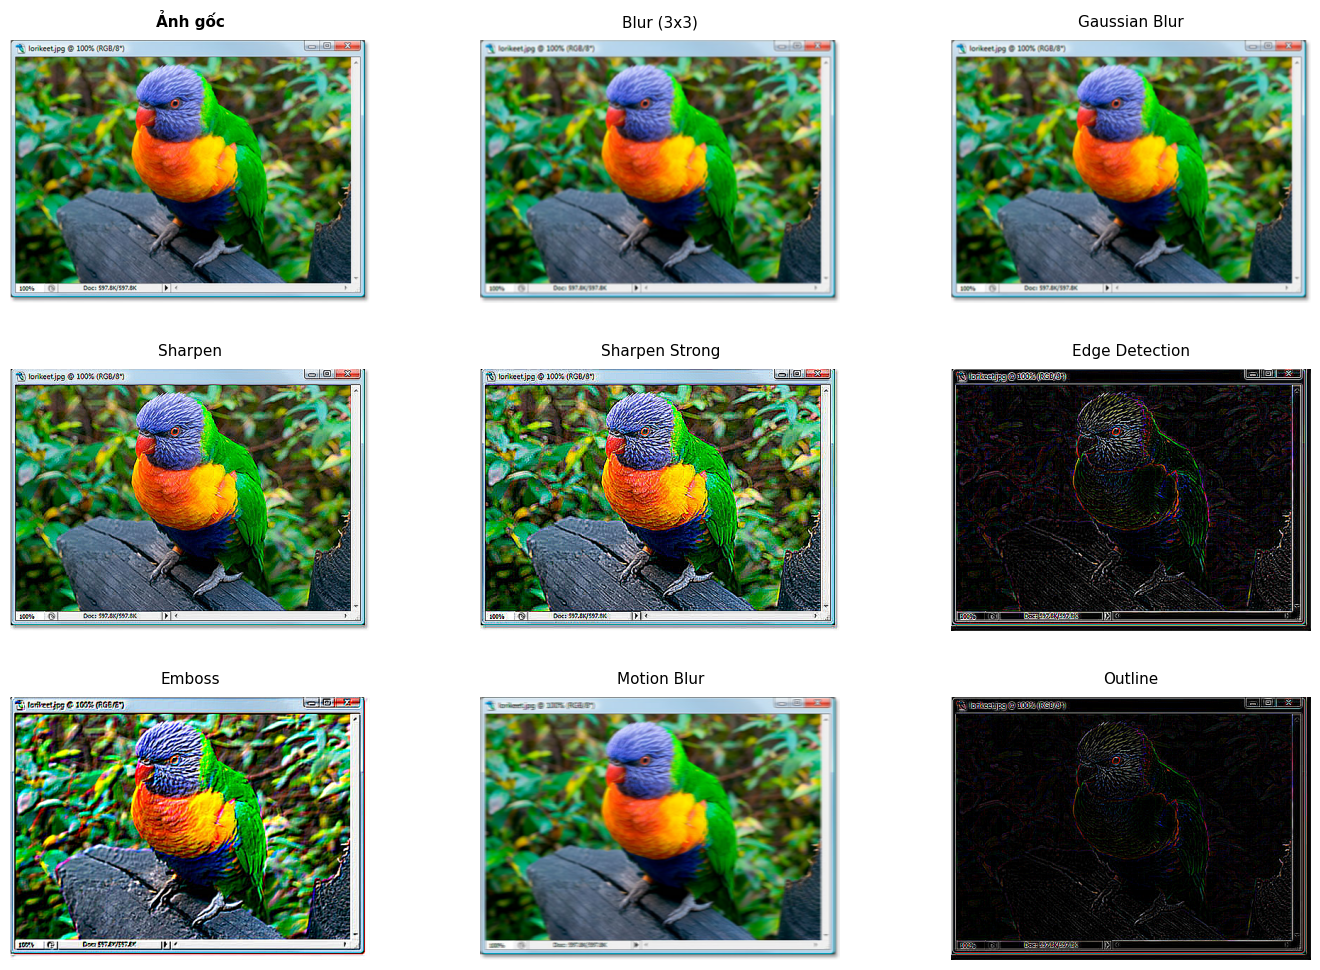

In [15]:
# ==================== 4. HIỂN THỊ KẾT QUẢ ====================
fig = plt.figure(figsize=(15, 10))

# Hàng 1
plt.subplot(3, 3, 1)
plt.title("Ảnh gốc", fontsize=11, fontweight='bold', pad=10)
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(3, 3, 2)
plt.title("Blur (3x3)", fontsize=11, pad=10)
plt.imshow(blur_img)
plt.axis("off")

plt.subplot(3, 3, 3)
plt.title("Gaussian Blur", fontsize=11, pad=10)
plt.imshow(gaussian_img)
plt.axis("off")

# Hàng 2
plt.subplot(3, 3, 4)
plt.title("Sharpen", fontsize=11, pad=10)
plt.imshow(sharpen_img)
plt.axis("off")

plt.subplot(3, 3, 5)
plt.title("Sharpen Strong", fontsize=11, pad=10)
plt.imshow(sharpen_strong_img)
plt.axis("off")

plt.subplot(3, 3, 6)
plt.title("Edge Detection", fontsize=11, pad=10)
plt.imshow(edge_img)
plt.axis("off")

# Hàng 3
plt.subplot(3, 3, 7)
plt.title("Emboss", fontsize=11, pad=10)
plt.imshow(emboss_img)
plt.axis("off")

plt.subplot(3, 3, 8)
plt.title("Motion Blur", fontsize=11, pad=10)
plt.imshow(motion_img)
plt.axis("off")

plt.subplot(3, 3, 9)
plt.title("Outline", fontsize=11, pad=10)
plt.imshow(outline_img)
plt.axis("off")

plt.subplots_adjust(left=0.05, right=0.95, top=0.94, bottom=0.02,
                    hspace=0.25, wspace=0.15)

plt.savefig(r'D:\UTH-CVIP-assignments\Solutions\Lab 2 (Chapter 2.1)\Bài tập nâng cao\Question 2\result.png', dpi=150, bbox_inches='tight')
print(f"\n Đã lưu kết quả")

plt.show()